# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Libraries different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score,make_scorer
import scipy.stats as stats

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

### Loading the dataset

In [2]:
# Reading the dataset into the dataframe
easy_visa = pd.read_csv("EasyVisa.csv")

In [3]:
# copying the original dataframe to another dataframe
data = easy_visa.copy()

### Overview of the Dataset

#### View the first and last 5 rows of the dataset.

In [4]:
# View the first 5 rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# View the last 5 rows of the dataset
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


* The case_status column has two values Certified and Denied.
* The case_ID column is containing unique values.


#### Shape of the Dataset

In [6]:
# Check the shape of the dataset
data.shape

(25480, 12)

* The EasyVisa dataset has 25480 rows and 12 columns.

#### Datatypes of the Columns of the Dataset

In [7]:
# check the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB



*   The variables no_of_employees and yr_of_estab are of data type int64. The prevailing_wage is of type float64.
*   All the other variables such as case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position and the target variable case_status are of data type object.





#### Missing value check

In [8]:
# Check for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the EasyVisa dataset.

#### Duplicate values check

In [9]:
# Check for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the dataset.

#### Statistical Summary of Numerical variables

In [10]:
# check the statistical summary of numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


##### **Observations**

*   The maximum number of employees is 602069 while the  minimum is shown as a negative value hence there are some negative values in the no_of_employees column which needs to be corrected.
*   The minimum year of establishment is 1800. Hence there are some very old employers in the dataset. The maximum year of establishment is 2016.
*   50% of the employers pay a prevailing wage of 70308 dollars. The minimum is showing as $2 which might the hourly unit of wage.



#### Statistical Summary of Categorical variables

In [11]:
# check the statistical summary of the categorical variables
data.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


##### **Observations**
*   The top continent from which the employees apply for visa to work in United States is Asia. Around 16861 workers have applied from Asia.
*   There are 4 levels of education of employees in the dataset among which Bachelor's take the top value with around 10234 people who studied Bachelor's are applying for US Visa.
*   More than 60% of the data has employees with Job Experience. Around 90% of the candidates applying for US Visa doesn't need Job training.
*   There are 5 regions in USA for which the candidates are applying for visa among which 'Northeast' takes the top value.
*   90% of the data has Yearly Wage level.
*   90% of the candidates are applying for Full time position.
*   Around 17018 candidates visa application is certified by OFLC(Office of Foreign Labor Certification).








#### no_of_employees column fix for Negative Value

In [12]:
# check the number of rows with negative values in the no_of_employees column
data.loc[data['no_of_employees']<0].shape

(33, 12)

There are 33 rows having negative values for no_of_employees. Lets correct this and make it a positive value.

In [13]:
# correct all the values in no_of_employees to positive values
data['no_of_employees'] = data.no_of_employees.abs()

In [14]:
# check if the neagtive values are fixed
data.loc[data['no_of_employees']<0].shape

(0, 12)

In [15]:
# check the statistical summary again to find the minimum value for no_of_employees column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


The negative value in the no_of_employees column is fixed and the minimum no_of_employees is 11 in the EasyVisa dataset.

#### Dropping Unique Values

In [16]:
# check for number of unique values
data.case_id.nunique()

25480

The case_id column contains only unique values and hence it can be dropped.

In [17]:
# Drop case_id column
data.drop(["case_id"], axis=1, inplace=True)

In [18]:
# copy the dataset to a new dataframe
df = data.copy()

In [19]:
# check to see if case_id is removed
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


The case_id column is successfully removed from the dataset.

#### Check the count of unique values of categorical variables

In [20]:
cols_cat= df.select_dtypes(['object'])

In [21]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

**Observations**
*   The Asian continent has highest applications for US work Visa followed by Europe.
*   Close to 40% of the candidates have done Bachelor's. There are 9634 candidates applying for US work visa have completed Master's degree.
*   More than 60% of the data has employees with Job Experience. Around 90% of the candidates applying for US Visa doesn't need Job training.
*   90% of the candidates are applying for full time position.
*   90% of the employers are offering Yearly wage.
*   Around 67% (17018 candiadtes) of the apllications have been certified by OFLC (Office of Foreign Labour Certification).






## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

**Lets define the following functions to carry out the EDA.**

In [22]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### no_of_employees

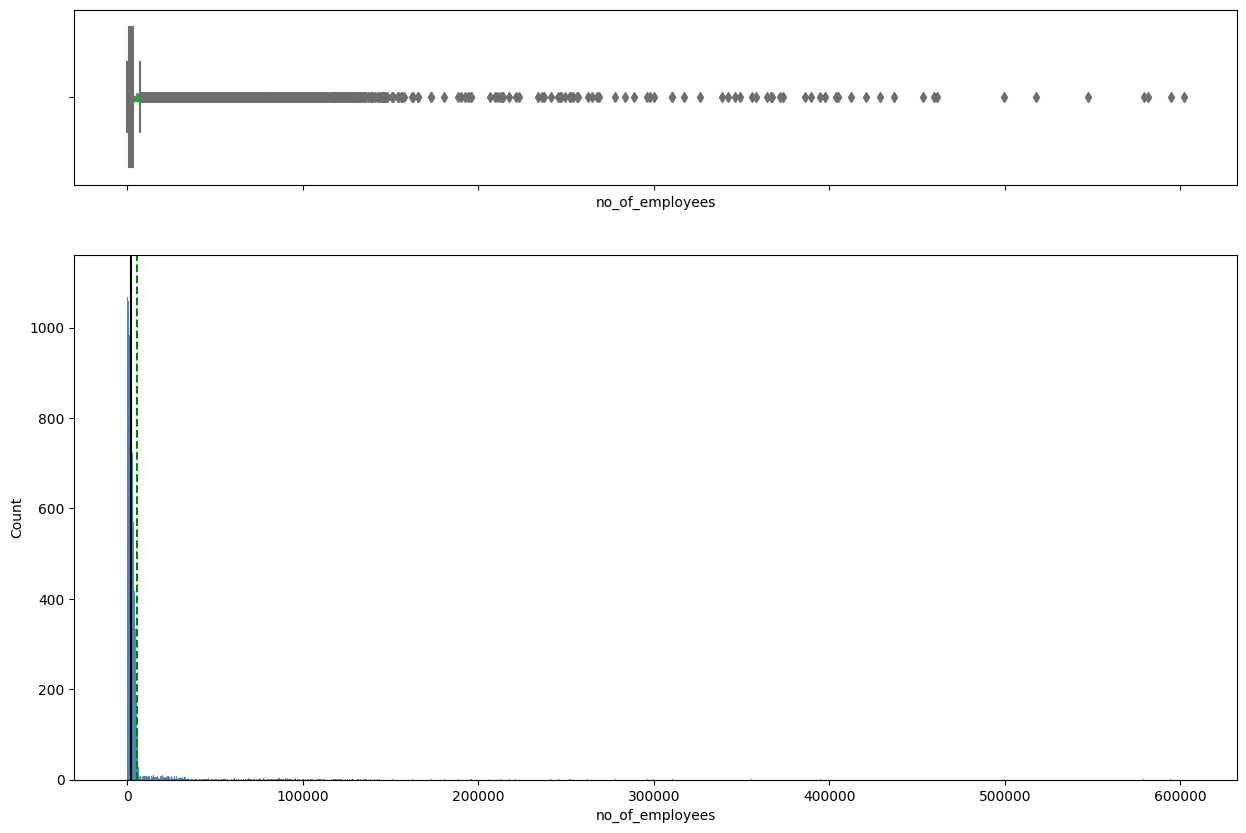

In [26]:
# create a histogram_boxplot
histogram_boxplot(data, "no_of_employees")

**Observations**

*   75% of the employers in the EasyVisa dataset has less than 3504 employees.
*   There are some employers having huge employee base of more than 100000 employees spanning upto 602069 employees.





#### Prevailing wage

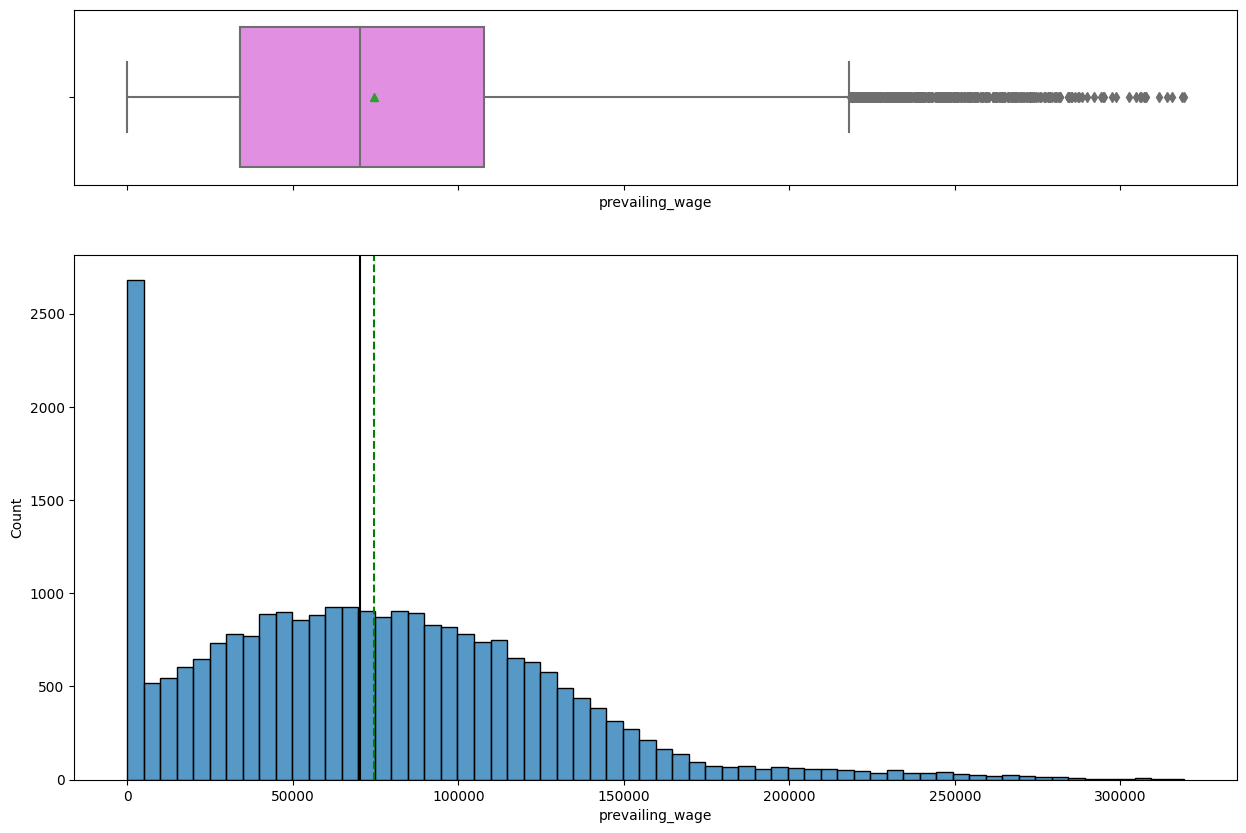

In [27]:
# create a histogram_boxplot
histogram_boxplot(data, "prevailing_wage")

**Observations**
*   The employers offer a prevailing wage with an average of 70000 dollars.
*   There are some outliers on the right side of the distribution showing that some employers offer a prevailing wage of more than 400000.
*   Close to 2700 employers offer a prevailing wage of less than 5000 dollars.

Lets check the unit of wage against the prevailing wage to get more idea.





In [28]:
# check the number of rows which has prevailing wage of less than 5000 dollars
data.loc[data['prevailing_wage']<5000].shape

(2682, 11)

There are 2682 rows with prevailing wage less than 5000 dollars.

In [29]:
# Check the corresponding unit of wage
data.loc[data["prevailing_wage"] < 5000, "unit_of_wage"].value_counts()

Hour     2157
Year      518
Week        4
Month       3
Name: unit_of_wage, dtype: int64

There are 518 employers who pay a prevailing wage of less than 5000 anually which is very less. On the contrary there are 4 employers who pay less than 5000 dollars prevailing wage every week which is a good salary.

The minimum value of prevailing wage is 2 dollars which should be hourly rate. Lets check the rows for which the prevailing wage is less than 100 dollars.

In [30]:
# check the number of rows which has prevailing wage of less than 100 dollars
data.loc[data['prevailing_wage']<100].shape

(176, 11)

There are 176 rows with prevailing wage less than 100 dollars.

In [31]:
# Check the corresponding unit of wage
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

The unit of wage for the 176 rows for which the prevailing wage is less than 100 dollars is 'Hour'.

#### Continent

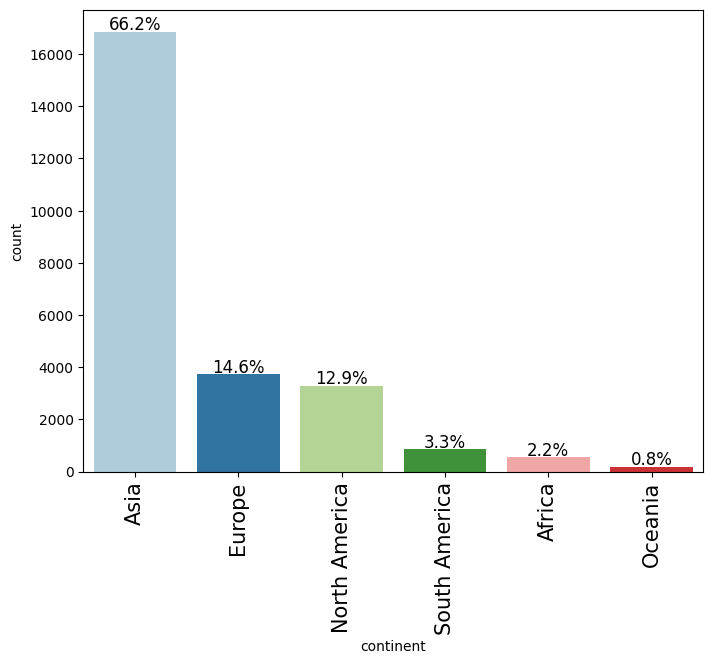

In [32]:
# create a labeled_barplot
labeled_barplot(data, "continent", perc=True)

**Observations**
*   The Asian continent has highest number of 66% of applicants for US visa followed by Europe and North America.
*   There are less than 1% of applicants for US Visa from Oceania continent.



#### education_of_employee

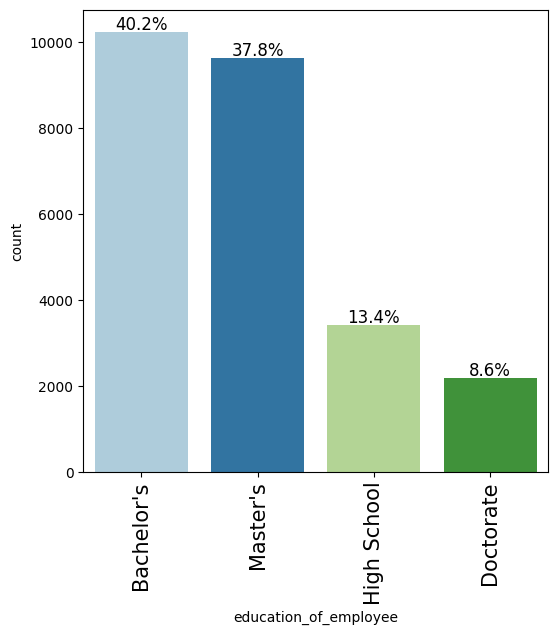

In [33]:
# create a labeled_barplot
labeled_barplot(data, "education_of_employee", perc=True)

**Observations**
*   40% of the candidates applying for USA work visa have completed Bachelor's degree. 37.8% of the candidates apllying for USA work visa have completed Master's degree.
*   Close to 9% candidates have Ph.D.



#### Job Experience

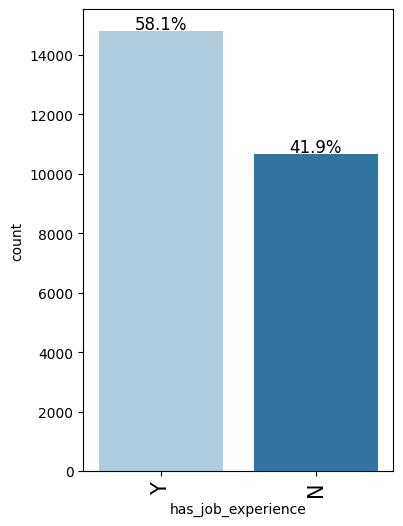

In [34]:
# create a labeled_barplot
labeled_barplot(data, "has_job_experience", perc=True)

**Observations**

58% of the candidates applying for USA work visa have prior job experience while 42% of the candidates doesn't have job experience.



#### Job Training

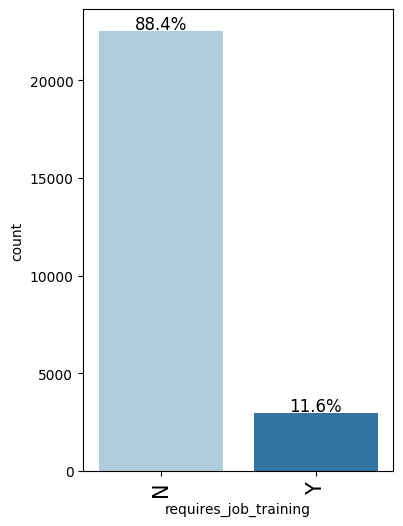

In [35]:
# create a labeled_barplot
labeled_barplot(data, "requires_job_training", perc=True)

**Observations**

88% of the candidiates doesn't need job training while 11% of the candidates requires to be trained.

#### Region of employment

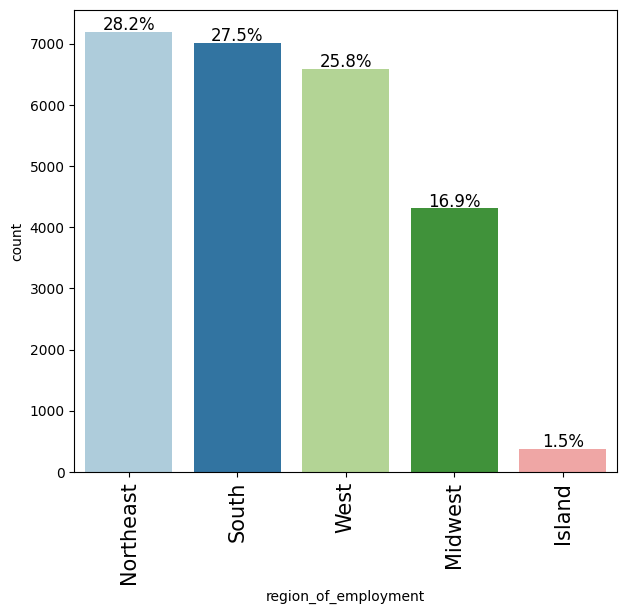

In [36]:
# create a labeled_barplot
labeled_barplot(data, "region_of_employment", perc=True)

**Observations**
*   Almost 28% of the candidates are applying to work in the Northeast region of the United states followed by 27% for South region and 25% for West coast.
*   The Island region is selected by 1.5% of candidates.



#### Full time Position

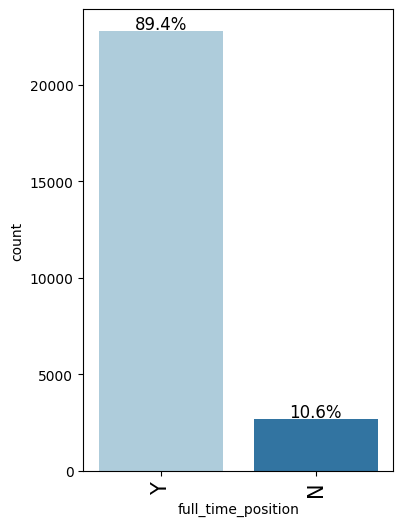

In [37]:
# create a labeled_barplot
labeled_barplot(data, "full_time_position", perc=True)

**Observations**

89% of the candidates are applying for full time jobs while 10% are applying for part time or contract jobs.

#### Case status

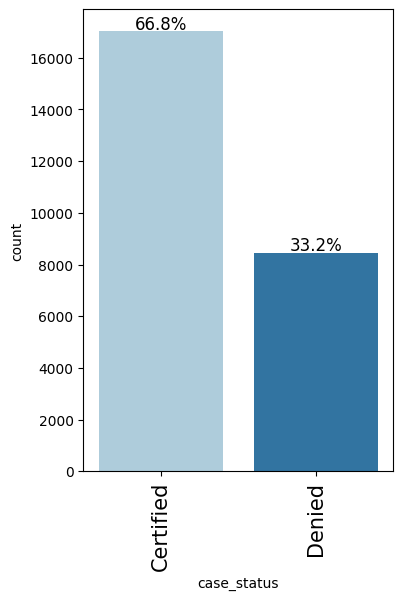

In [38]:
# create a labeled_barplot
labeled_barplot(data, "case_status", perc=True)

**Observations**

67% of the candidates applications have been certified while 33% were denied.

### Bivariate Analysis

#### Correlation check

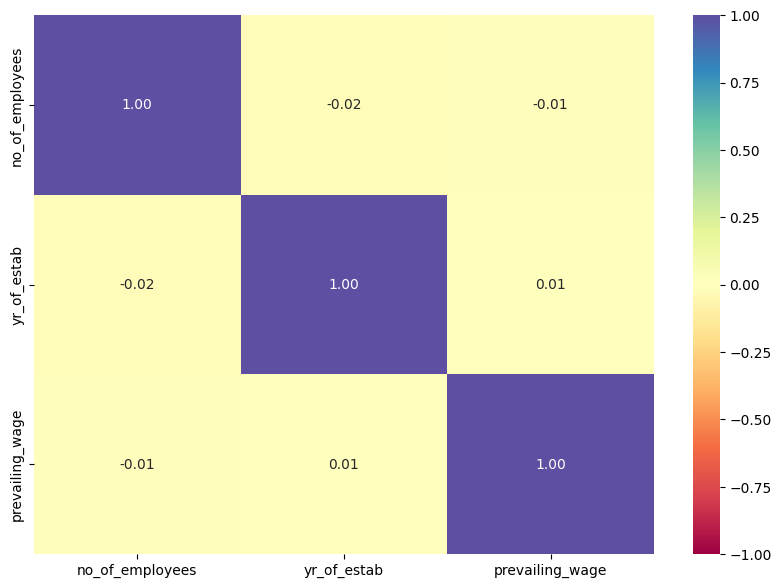

In [39]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

There is neither a very strong nor a very weak correlation among the numerical variables. Overall there is no meaningful correlation among the continuous variables as the correlation is close to zero.




#### Education of employee vs case status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


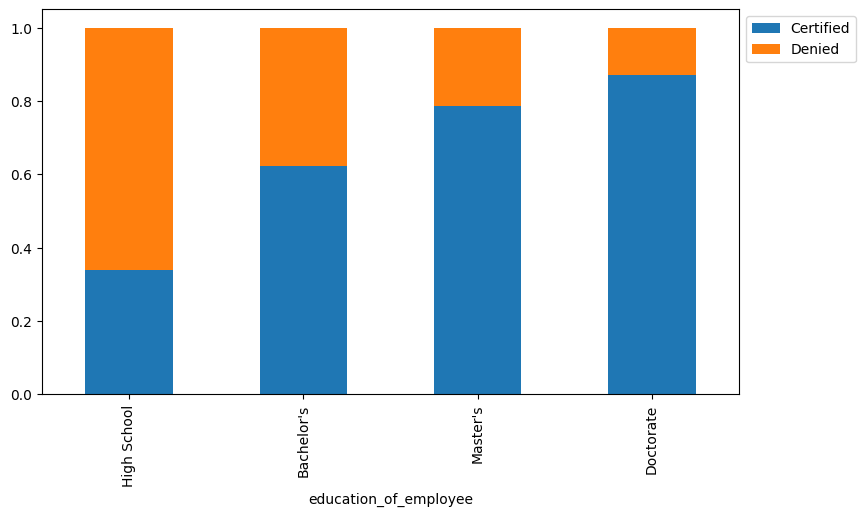

In [40]:
# create a stacked barplot
stacked_barplot(data, "education_of_employee", "case_status")

**Observations**

*   The probability of visa getting certified is around 90% for candidates with Ph.D.
*   The Probablity of visa getting certified for candidates with Master's degree is close to 80% followed by Bachelor's with 65% probability.
*   The applicants with only a High school degree has very less chance of 30% of visa getting certified.

**From the above visualization and observations on the numbers we can clearly see that the education of the employee has lot of value in determining the certification of the visa application.**






#### Job Experience vs Case status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


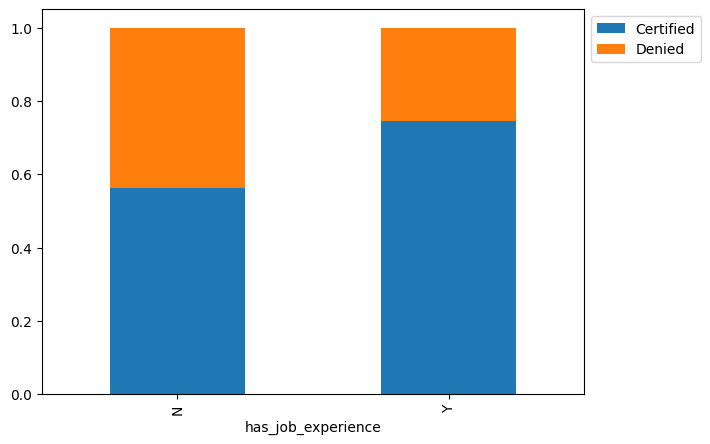

In [41]:
# create a stacked barplot
stacked_barplot(data, "has_job_experience", "case_status")

**Observations**

Applicants with prior job experience has a probability of 70% of visa getting certified compared to applicants without job experience making only a 50% chance of visa getting certified.

#### Continent vs Case status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


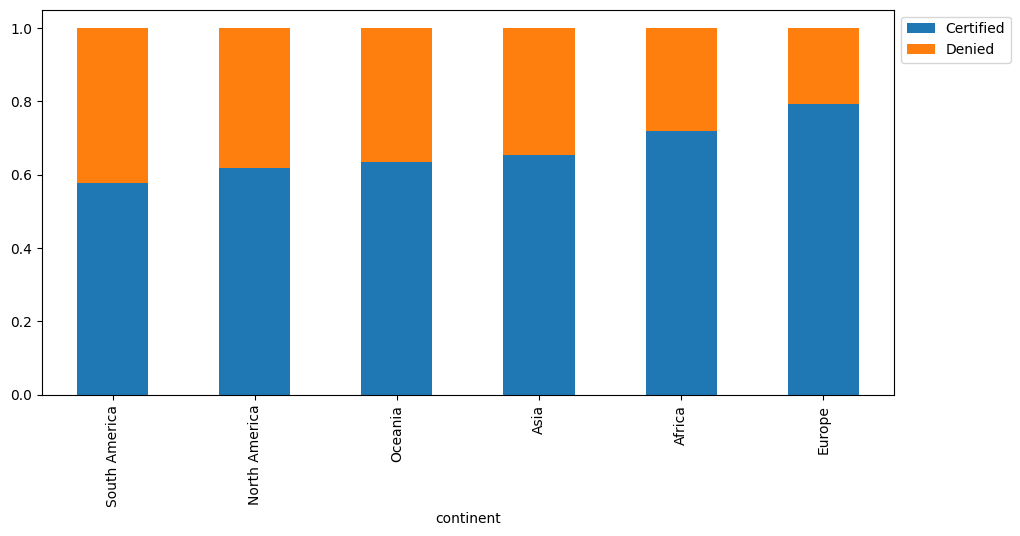

In [42]:
# create a stacked barplot
stacked_barplot(data, "continent", "case_status")

**Observations**

*   The applicants from Europe has highest of 80% of Visa certification.
*   The applicants from South America has the lowest probability of 58% of visa getting certified among all the other continents.
*   The applicants from Asia, North America and Ocenaia have equal probabilty of around 60% of their visa getting certified.






#### Region vs Case status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


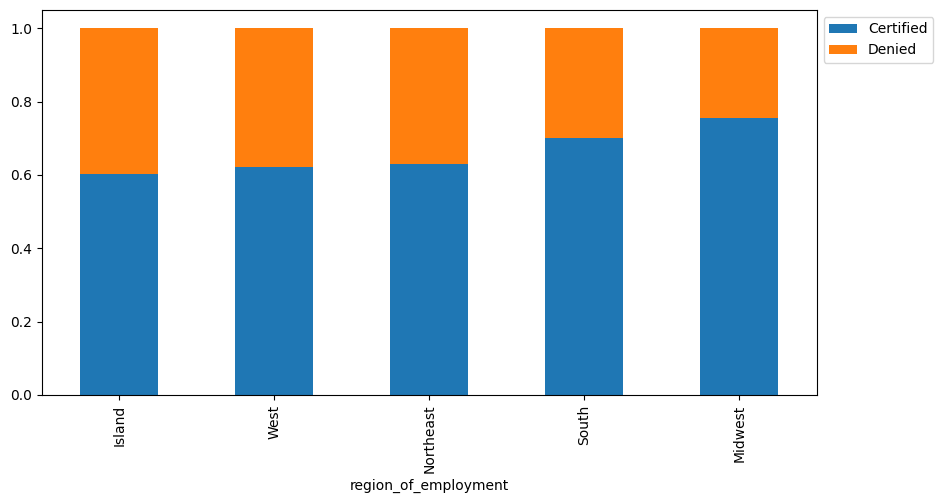

In [43]:
# create a stacked barplot
stacked_barplot(data, "region_of_employment", "case_status")

**Observations**

*   The applicants who selected their intended region of employment as West coast, Northeast and Island have 60% chance of their visa getting certified.
*   The Deniel rate is less for applicants intended region of employment is Midwest.



#### Region of Employment vs Education of Employee

Lets check how the different levels of education of the employees is split across the intended region of employment.

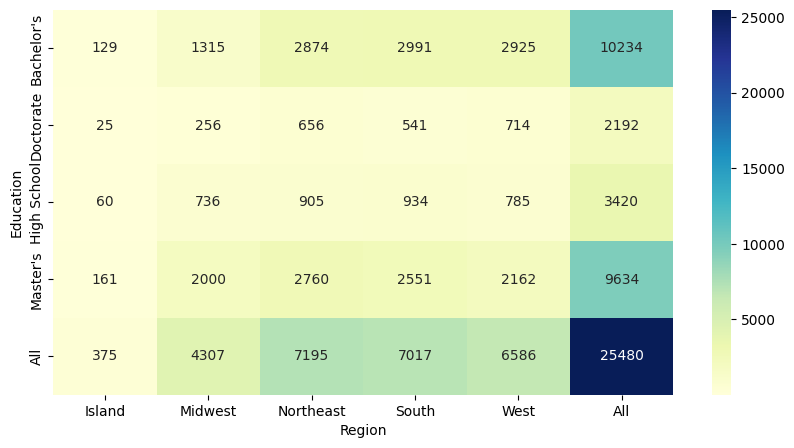

In [44]:
# create heatmap for the crosstab between region of employment and education of employee
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data.education_of_employee,data.region_of_employment,margins=True),
    annot=True,
    fmt="g",
    cmap="YlGnBu"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Observations**

*   There are more than 2900 applicants who completed Bachelor's have selected their intended region of employment as either south or West.
*   In the Northeast region there are more Master's candidates compared to all the other regions.
*   Large number of the candidates who are Doctorates have preferred their work region to be Northeast.





#### Prevailing wage vs Case status

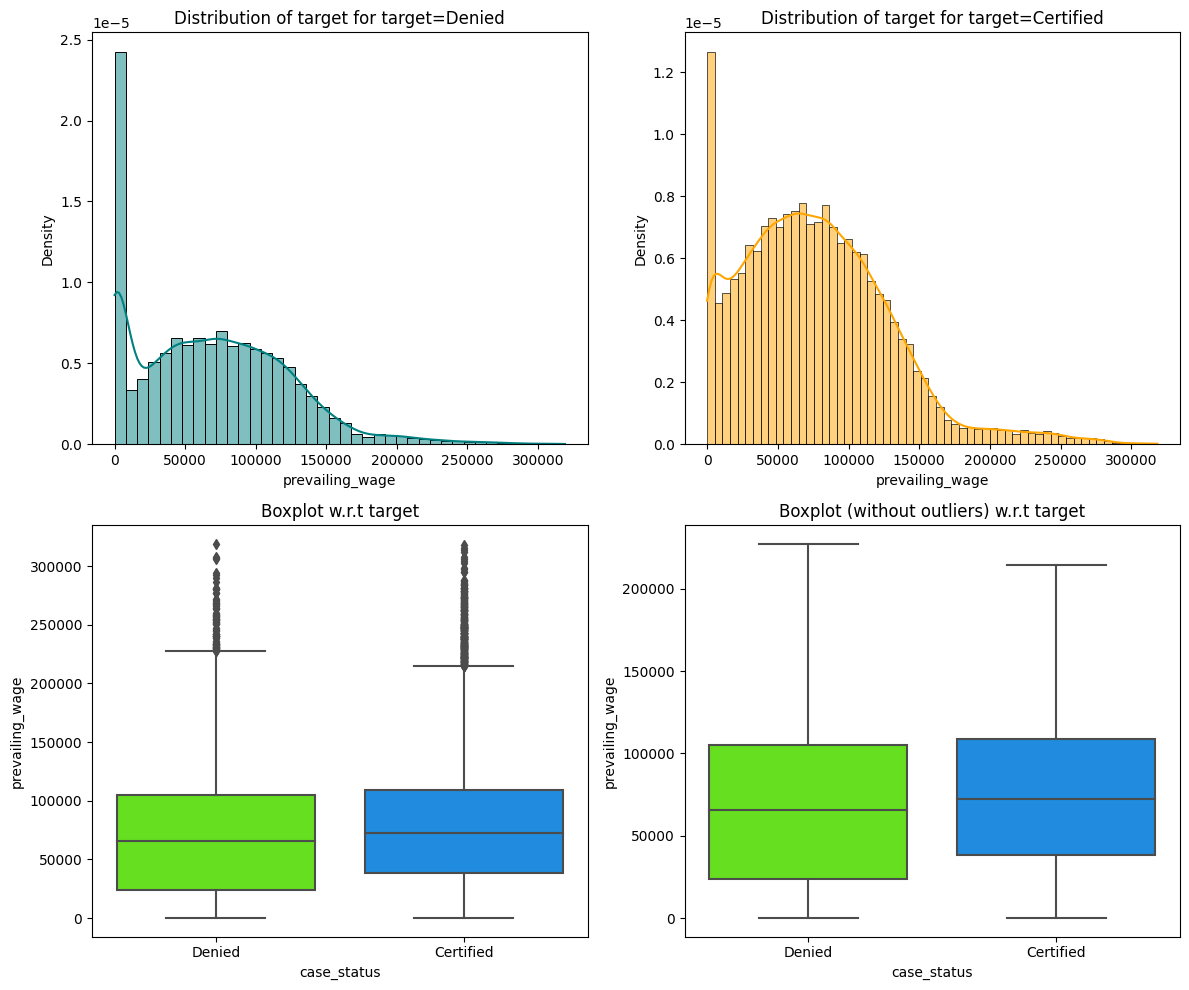

In [45]:
# create a distribution plot
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

**Observations**
*   The median value of prevailing wage for cases of both certified and denied is close to 70000 dollars. However the median prevailing wage of cases certified is slightly higher than cases which are denied.
*   Less than 25% of cases which are certified have prevailing wage of atleast 30000 dollars.



#### Unit of wage vs case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


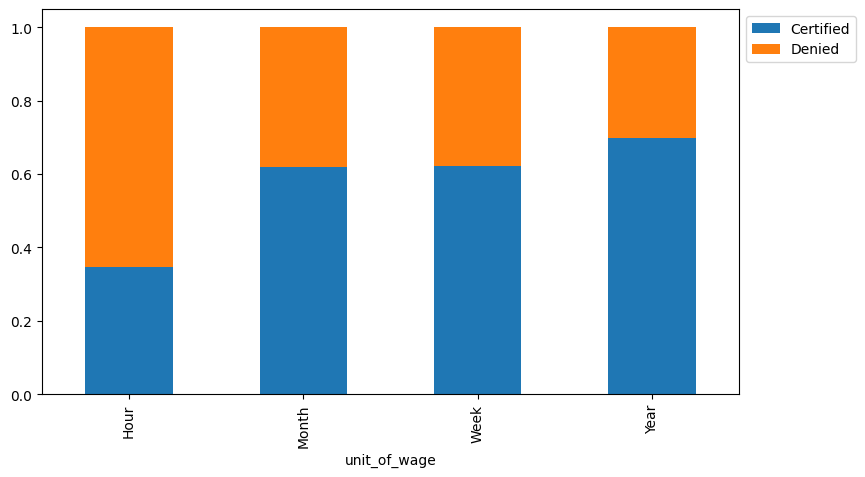

In [46]:
# create a stacked barplot
stacked_barplot(data, "unit_of_wage", "case_status")

**Observations**
*   Candidates applying to work for the employers who pay an yearly salary have less probability of their visa getting denied meaning the probability of the visa getting certified is 70% which is higher than other unit of wage.
*   Employers who pay Hourly salary have the visa certified rate to be very low close to 35% compared to all the other unit of wages such as Month, Yer and Week.
*   The visa getting certified chances is equal to about 60% for unit of wages Month and Week.






#### Region vs Unit of wage

Lets check how the unit of wage varies across different region of employment in United States.

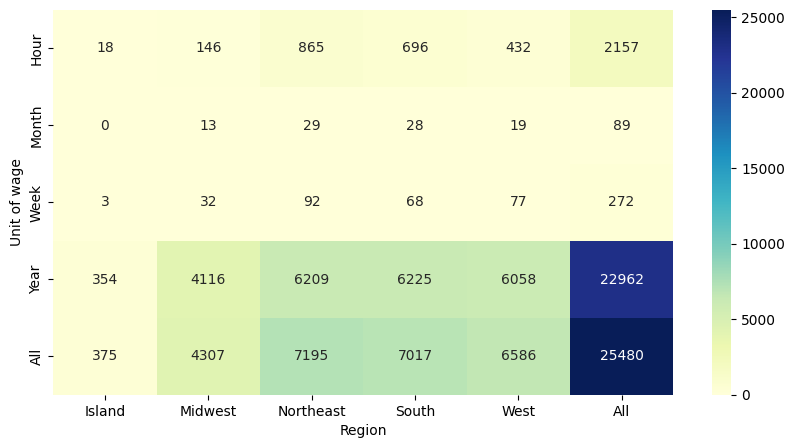

In [47]:
# create heatmap for the crosstab between region of employment and unit of wage
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data.unit_of_wage,data.region_of_employment,margins=True),
    annot=True,
    fmt="g",
    cmap="YlGnBu"
)

plt.ylabel("Unit of wage")
plt.xlabel("Region")
plt.show()

**Observations**
*   Across all the regions, the employers tend to pay mostly an yearly salary.
*   There is no monthly salary offered by the employers in the Island region.
*   The highest number of employers offering annualy salary belong to Northeast region.





#### Region vs Prevailing wage

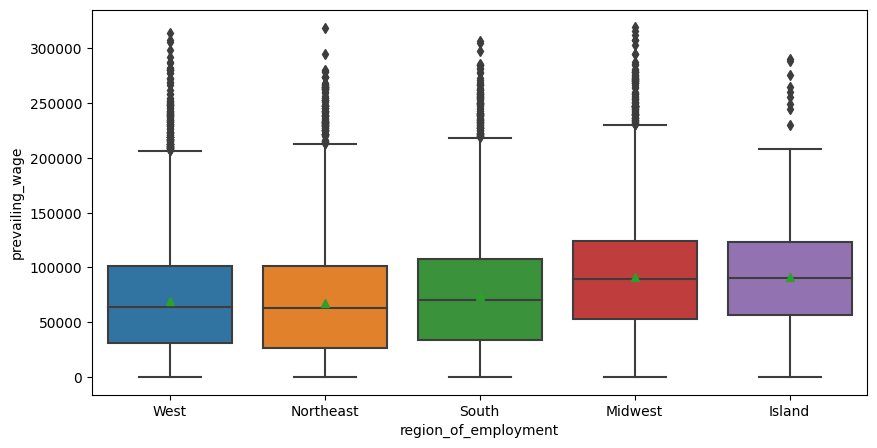

In [48]:
# create a boxplot to visualize the relationship between region and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(data,x="region_of_employment",y="prevailing_wage",showmeans=True)
plt.show()

**Observations**
*   The mean value of the prevailing wage is almost same for west, Northeat and South regions with a value of 70000 dollars.
*   The median value of prevailing wage is higher for Midwest region.
*   There are some outliers on the prevailing wage for all regions of employment.






**EDA Summary of Observations**

*   There are some employers having huge employee base of more than 100000 employees spanning upto 602069 employees.
*   The Asian continent has highest number of 66% of applicants for US visa followed by Europe and North America.
*   40% of the candidates applying for USA work visa have completed Bachelor's degree. 37.8% of the candidates apllying for USA work visa have completed Master's degree.
*   58% of the candidates applying for USA work visa have prior job experience while 42% of the candidates doesn't have job experience.
*   The education of the employee has lot of value in determining the certification of the visa application.
*   Applicants with prior job experience has a probability of 70% of visa getting certified compared to applicants without job experience making only a 50% chance of visa getting certified.
*   The applicants from Europe has highest of 80% of Visa certification whereas the applicants from South America has the lowest probability of 58% of visa getting certified among all the other continents.
*   There are more than 2900 applicants who completed Bachelor's have selected their intended region of employment as either south or West.
*   Candidates applying to work for the employers who pay an yearly salary have less probability of their visa getting denied meaning the probability of the visa getting certified is 70% which is higher than other unit of wage.
*   Employers who pay Hourly salary have the visa certified rate to be very low close to 35% compared to all the other unit of wages such as Month, Yer and Week.
*   The median value of prevailing wage for cases of both certified and denied is close to 70000 dollars. However the median prevailing wage of cases certified is slightly higher than cases which are denied. Less than 25% of cases which are certified have prevailing wage of atleast 30000 dollars.







## Data Preprocessing


There are no missing values in the EasyVisa dataset as we have checked that earlier. Hence lets check if there are any outliers in the data.

### Outlier Detection

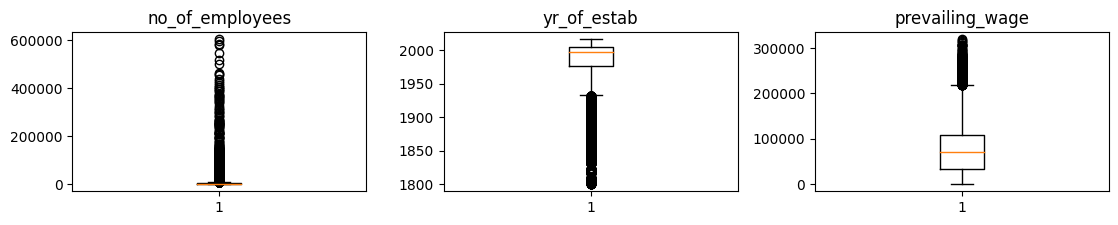

In [49]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

There are some outliers in all the numerical columns. However these seem to be proper values and doesn't need to be treated.

### Data Preparataion for model building

* Lets build a model to predict whether the visa to work in the United states will be certified or not. Lets create dummy variables for the categorical columns and encode the values.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.



In [50]:
data['case_status'] = data['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

X = data.drop(['case_status'],axis=1)
y = data['case_status']

X = pd.get_dummies(X,drop_first=True)

In [51]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [52]:
# Print the shape of the training and test set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


**Observations**

Around 67% of observations belongs to class 1 (Visa certified) and 33% observations belongs to class 0 (Visa Denied), and this is preserved in the train and test sets.

### Model Performance Evaluation


**Model can make wrong predictions as:**

1. Predicting that the visa will get certified but in reality the visa is denied.
2. Predicting that the visa will be denied but in reality the visa is certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied then the employer hires a wrong employee for the job position and hence the US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the United States will lose a capable human resource that can contribute to the economy.


### How to reduce the losses?

* We would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [53]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Decision Tree

## Building bagging and boosting models

Lets build a default decision tree model and check the performance and then if the performance is not satisfying enough then lets build the Bagging and Boosting models.

If in case we need to make the performance of the model better then lets build the decision tree, Bagging and Boosting models with hyperparameter tuning.

### Model Building - Decision Tree

In [55]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Checking Decision tree model performance on training set**

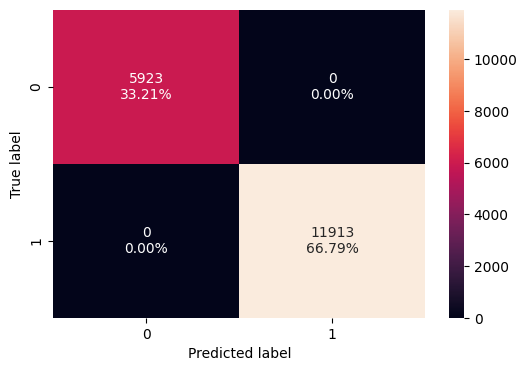

In [56]:
# create a confusion matrix
confusion_matrix_sklearn(model, X_train, y_train)

In [57]:
# checking the performance metrics on the training set
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Checking Decision tree model performance on test set**

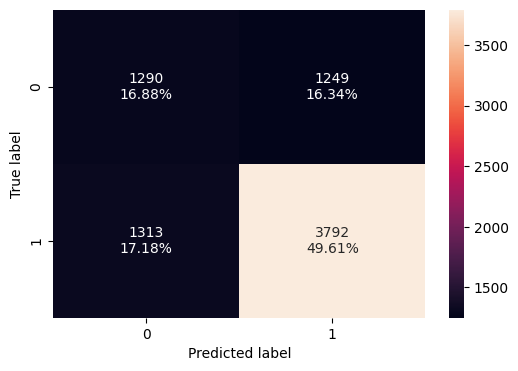

In [58]:
# create a confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

In [59]:
# checking the performance metrics on the test set
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


**Observations**

The Decision tree model is performing too well on the training set with all the performance metrics as 1 which shows that the model is overfitting. In the test set there is a huge difference of 20% of the values for all the performance metrics when compared to the training set. Hence the model is not generalizing well on the test data.

Lets provide some hyperparameters to the decision tree model and check the performance.

### Decision Tree - Hyperparameter Tuning

In [60]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from

parameters = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

**Checking Decision Tree-Hyperparameter tuned Model Performance on the Training set**

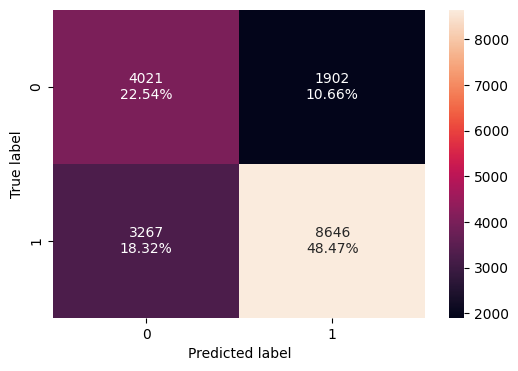

In [61]:
# create Confusion matrix
confusion_matrix_sklearn(estimator, X_train, y_train)

In [62]:
# check performance metrics on the training set
estimator_model_train_perf = model_performance_classification_sklearn(estimator, X_train, y_train)
estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.710193,0.725762,0.819681,0.769868


**Checking Decision Tree-Hyperparameter tuned Model Performance on Test set**

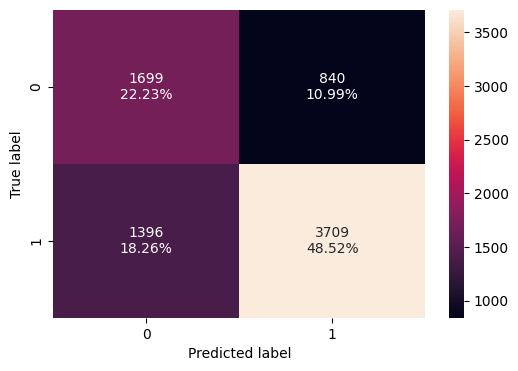

In [63]:
# create Confusion matrix
confusion_matrix_sklearn(estimator, X_test, y_test)

In [64]:
# check performance metrics on the test set
estimator_model_test_perf = model_performance_classification_sklearn(estimator, X_test, y_test)
estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.707483,0.726543,0.815344,0.768386


**Observations**

The Decision Tree - Hyperparameter tuned model is performing well on both the training and test set and it is also generalizing well on the test data. Lets see if we can improve this performance by Bagging and Boosting methods.

### Bagging classifier

Lets build a default Bagging classifier model with random_state set to 1 and check the performance.

In [65]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

**Checking Bagging classifier model performance on the training set**

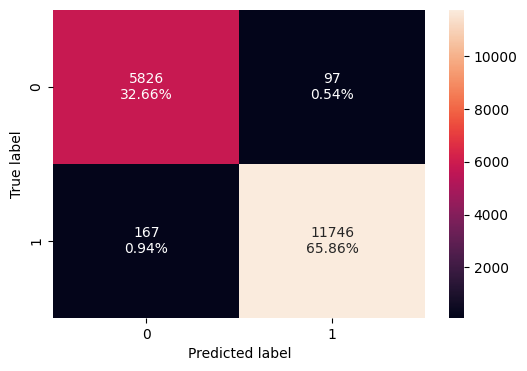

In [66]:
# create a confusion matrix
confusion_matrix_sklearn(bagging, X_train, y_train)

In [67]:
# check the performance metrics on the training set
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


**Checking Bagging Classifier model performance on test set**

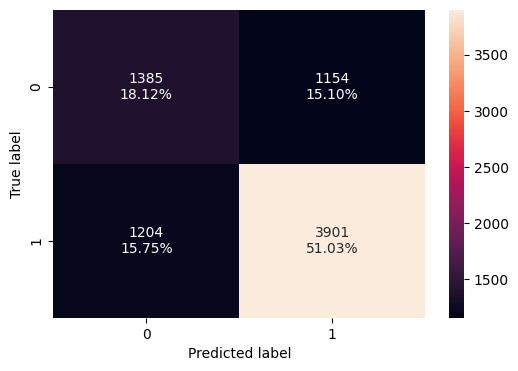

In [68]:
# create a confusion matrix
confusion_matrix_sklearn(bagging, X_test, y_test)

In [69]:
# check the performance metrics on the test set
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


**Observations**

The Bagging classifier model is performing too well on the training set and performs poorly on the test set. Hence the Bagging classifier model does not generalize well on the test data.

### Random Forest

In [70]:
rf = RandomForestClassifier(random_state=1,class_weight="balanced")
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

**Checking Random Forest Model Performance on training set**

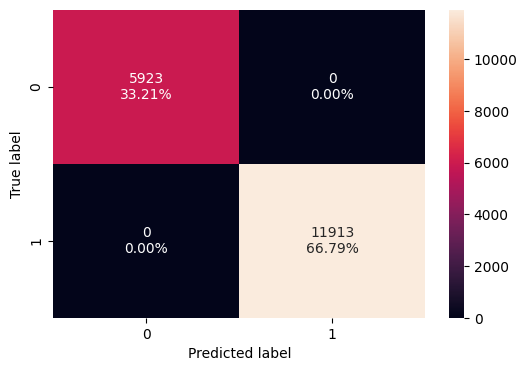

In [71]:
# create a confusion matrix
confusion_matrix_sklearn(rf, X_train, y_train)

In [72]:
# check the performance metrics on the training set
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**Checking Random Forest Model Performance on test set**

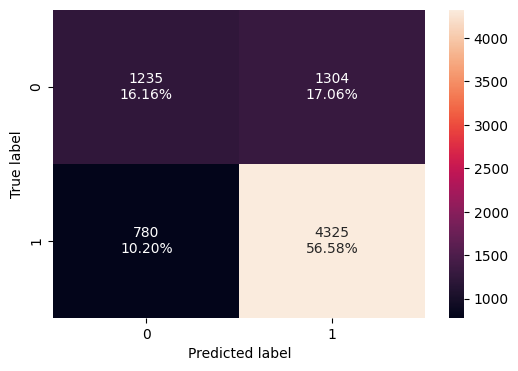

In [73]:
# create a confusion matrix
confusion_matrix_sklearn(rf, X_test, y_test)

In [74]:
# check the performance metrics on the test set
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.727368  0.847209   0.768343  0.805851


**Observations**

The Random Forest classifier performs too well on the trainig set and hence it is overfitting the training data. There is a huge difference of 20% in the performance metrics values of the test set when compared to the training set meaning the Random Forest classifier model does not generalize well on the test data.

However on the performance metrics comparison of the test data between the Bagging and Random Forest classifier models, the Random Forest classifier model performs really well.

Lets check the model performance by assigning some hyperparameters to the Bagging and Random Forest classifier model.

### Hyperparameter Tuning - Bagging Classifier

In [75]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

**Checking Hyperparameter tuned Bagging classifier model performance on training set**

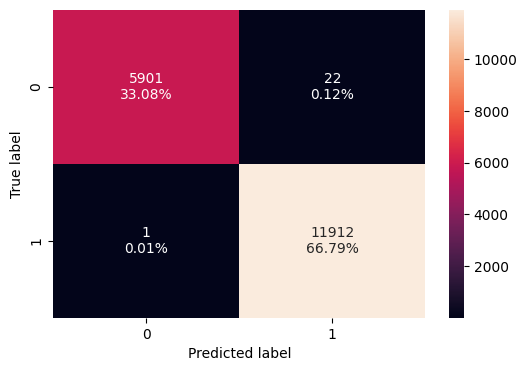

In [76]:
# create a confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [77]:
# check the performance metrics on the training set
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance \n",bagging_estimator_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.99871  0.999916   0.998157  0.999036


**Checking Hyperparameter tuned Bagging classifier model performance on test set**

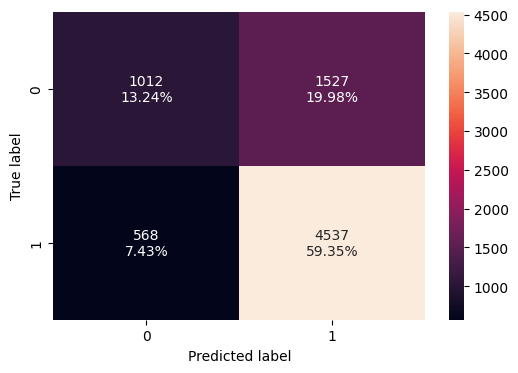

In [78]:
# create a confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [79]:
# check the performance metrics on the test set
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance \n",bagging_estimator_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.725929  0.888737   0.748186  0.812427


**Observations**

The Hyperparameter tuned Bagging classifier model performs too well on training set meaning it is overfitting the data. There is a huge difference of 20% of values of the performance metrics between the training and test set. Hence the model is not generalizing well on the test data.

However when we compare the performance metrics of the default bagging classifier and the Hypertuned Bagging classifier, the hypertuning has helped in improving the Recall and F1 score. The precision in the Hypertuned Bagging classifier model is slightly less.

Lets hypertune the Random Forest classifier and check the performance.

### Hyperparameter tuning - Random Forest

In [80]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

**Checking Hyperparameter tuned Random Forest Classifier model performance on the training set**

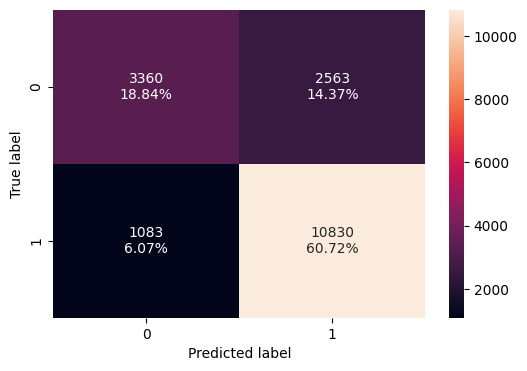

In [81]:
# create a confusion matrix
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [82]:
# check the performance metrics on the training set
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.795582  0.909091   0.808631  0.855923


**Checking Hyperparameter tuned Random Forest Classifier model performance on the test set**

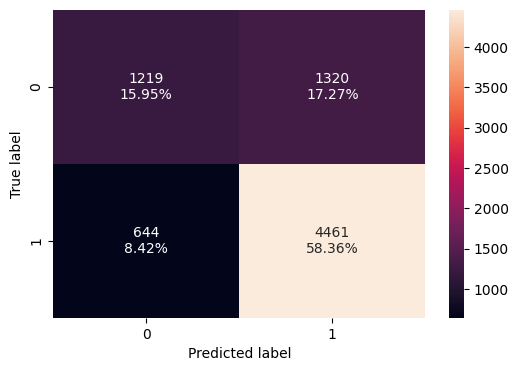

In [83]:
# create a confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [84]:
# check the performance metrics on the test set
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743066  0.873849   0.771666  0.819585


**Observations**

The Hyperparameter tuned Random Forest Classifier model performs well on both training and test set. The values of the performance metrics in the training and test set are almost close to each other and the difference is only 4%, hence the Hypertuned Random Forest model is generalizing moderately well on the test data.


**Summary of Observations - Decision Tree, Bagging and Random Forest**

*   The Default Decision tree model is not generalizing well on the test data. Hence we cant consider the model to provide machine learning based solution for EasyVisa.
*   The Hyperparameter tuned Decision tree model is performing well on the test data and also the model is generalizing well.
*   The Default Bagging classifier model and the Hyperparameter tuned Bagging classifier model is not generalizing well on the test data. Hence the Bagging classifier cannot be considered for machine learning based solution for EasyVisa.
*   The Default Random Classifier model does not generalize well on the test data. However when we tune the Random Forest Classifier the model really performs well and also generalizes well.

Both the Hyperparameter tuned Decision tree and the Hyperparameter tuned Random Forest models are performing well on the test data. However the Hyperparameter tuned Random Forest classsifer performance metrics values of Recall, Precision and the F1 score is higher than the hyperparameter tuned Decision tree model.

Hence the Hyperparameter tuned Random Forest classifier model performs well in reducing the False Positives and the False Negatives and therefore can be considered to provide machine learning based solution for EasyVisa.





**Lets proceed on the Boosting techniques to see if the model performance gets better than Random Forest.**

### Boosting

Lets build the model using the boosting methods such as AdaBoost, Gradient Boost and XGBoost and check the model performance.

If we need to scale up the performance lets pass some Hyperparameters to these boosting methods and compare the performance metrics to see if we can optimize on reducing the False Positives and False Negatives.

#### AdaBoost Classifier

In [85]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

**Checking AdaBoost Classifier Model performance on training set**

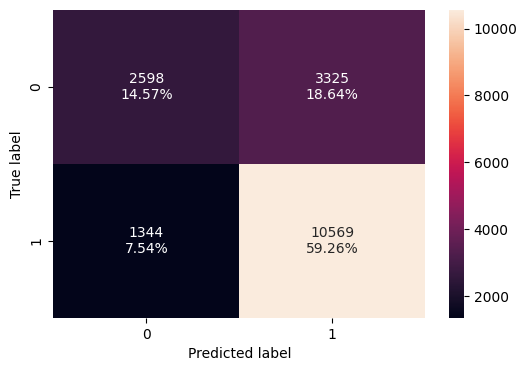

In [86]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [87]:
# Checking the performace metrics on the training set
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


**Checking AdaBoost Classifier Model performance on test set**

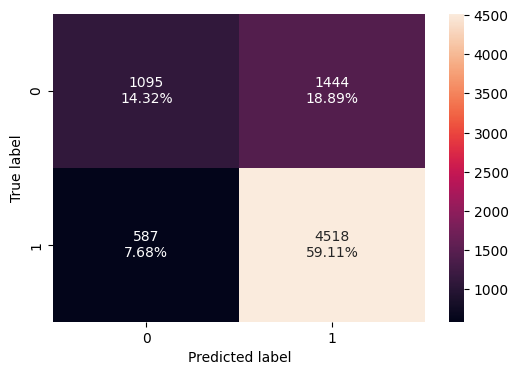

In [88]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [89]:
# Checking the performace metrics on the test set
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


**Observations**

The AdaBoost Classifier model performs well on training and test set. The model also generalizes well on the test data. The F1 score is 80% which is really good.

#### Gradient Boosting Classifier

In [90]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

**Checking Gradient Boosting classifier model performance on the training set**

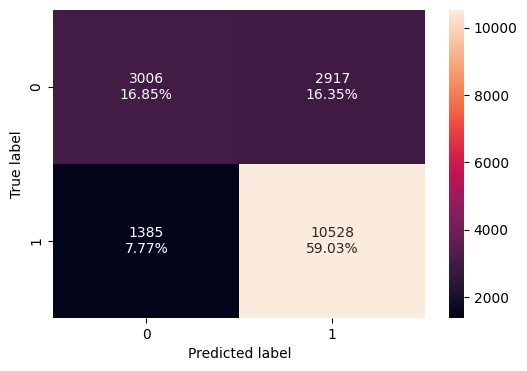

In [91]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [92]:
# Checking the performace metrics on the training set
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance \n",gb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


**Checking Gradient Boosting classifier model performance on the test set**

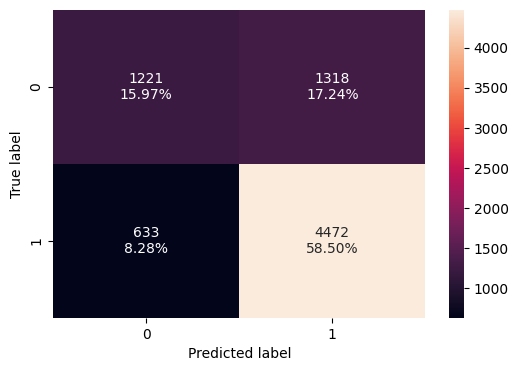

In [93]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [94]:
# Checking the performace metrics on the test set
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance \n",gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


**Observations**

The Gradient Boosting classifier model performs well on the training and test data. The model is generalizing well on the test data meaning it is not underfitting or overfitting the data. The F1 score is 82% which is slightly better than the AdaBoost classifier model.

#### XGBoost Classifier

In [95]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

**Checking XGBoost Classifier model performance on the training set**

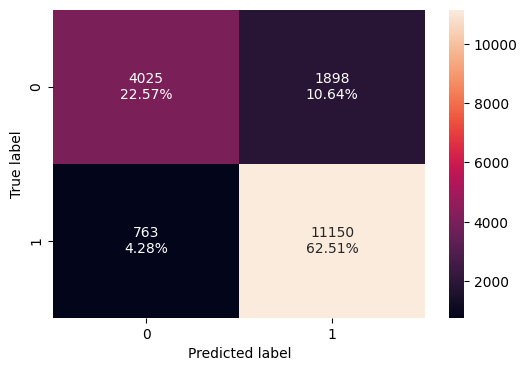

In [96]:
# Create confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [97]:
# Checking Performance metrics on the training set
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394


**Checking XGBoost Classifier model performance on the test set**

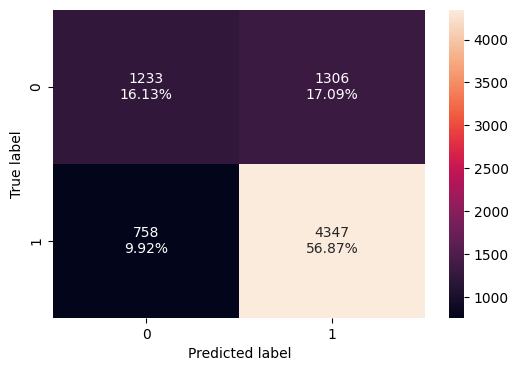

In [98]:
# Create confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [99]:
# Checking Performance metrics on the test set
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143


**Observations**

The XGBoost classifier model is perrforming well on the training data. However the difference in the performance metrics values between the training and test set is around 8% which is high. Hence the model is not generalizing well on the test data.

When comparing with the Gradient Boosting classifier model, the performance metrics values of the test data is slightly less in the XGBoost classifier model.

**Lets do the Hyperparameter tuning and validate the performance of the boosting models.**

#### Hyperparameter tuning - AdaBoost Classifier

In [100]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

**Checking Hyperparameter tuned AdaBoost Classifier model performance on the training set**

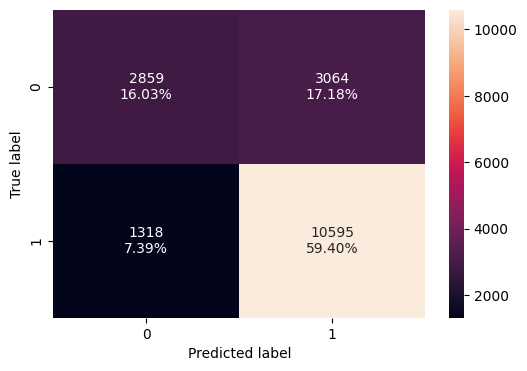

In [101]:
# Create confusion matrix
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [102]:
# Checking the performance metrics on the training set
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.754317  0.889365   0.775679  0.828641


**Checking Hyperparameter tuned AdaBoost Classifier model performance on the test set**

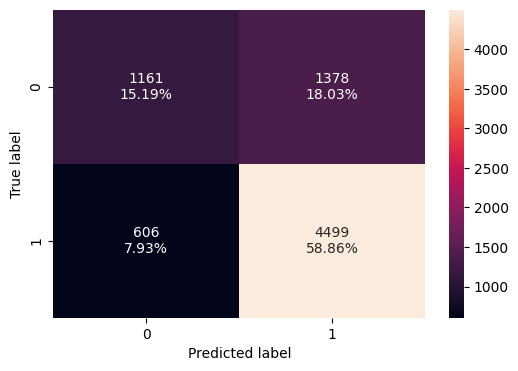

In [103]:
# Create confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [104]:
# Checking the performance metrics on the test set
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.74045  0.881293   0.765527  0.819341


**Observations**

The Hypertuned AdaBoost classifier model performs well on both training and test set. The model also generalizes well on the test data.

When compared with the default AdaBoost classifier performance, there isn't a huge improvement in the performance metrics and the model's performance on the test data is almost similar to the default AdaBoost model.


#### Hyperparameter Tuning - Gradient Boosting Classifier

In [105]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

**Checking Hyperparameter tuned Gradient Boost Classifier model performance on the training set**

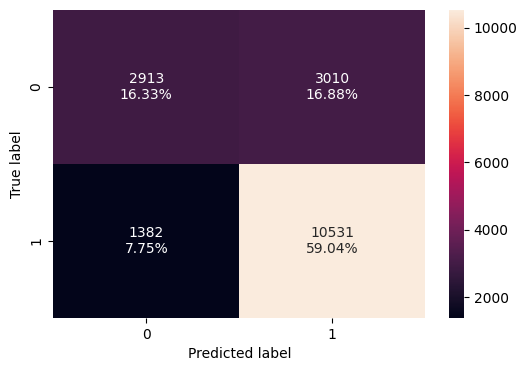

In [106]:
# Create confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [107]:
# Checking the performance metrics on the training set
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.753756  0.883992   0.777712  0.827453


**Checking Hyperparameter tuned Gradient Boost Classifier model performance on the test set**

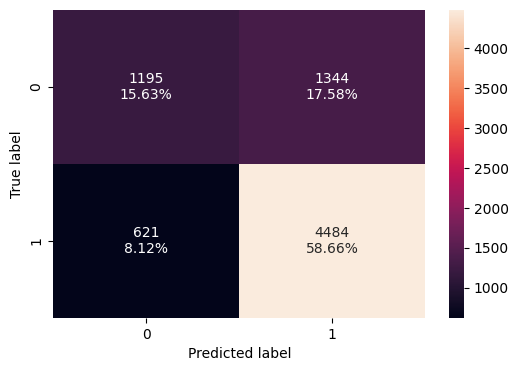

In [108]:
# Create confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [109]:
# Checking the performance metrics on the test set
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.742936  0.878355   0.769389  0.820269


**Observations**

The Hyperparameter tuned Gradient boost classifier model performs well on both training and test set. The model is generalizing well on the test set meaning it is neither underfitting nor Overfitting the data. Also the F1 score of the test data is slightly higher than the hyperparamater tuned AdaBoost classifier.

The results of the performance metrics after hyperparameter tuning doesn't greatly increase the values of the Precision and Recall when compared with the default Gradient Boosting.

### Hyperparameter Tuning - XGBoost Classifier

In [110]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from

parameters={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

**Checking Hyperparameter tuned XGBoost classifier model performance on the training set**

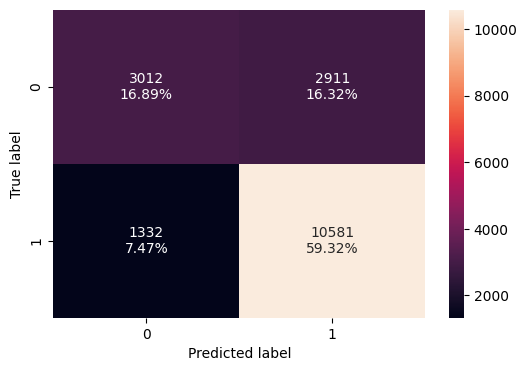

In [111]:
# Create confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [112]:
# Checking the performance metrics on the training set
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.76211  0.888189   0.784243  0.832986


**Checking Hyperparameter tuned XGBoost Classifier model performance on the test set**

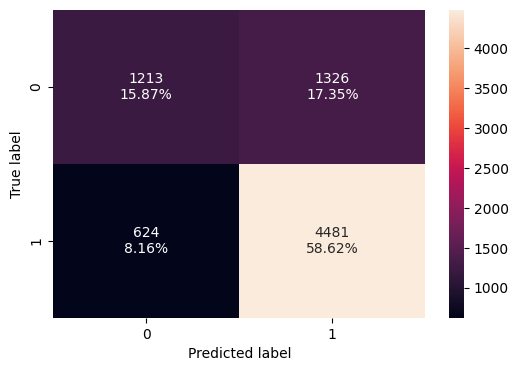

In [113]:
# Create confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [114]:
# Checking the performance metrics on the test set
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744898  0.877767   0.771655  0.821298


**Observations**

The Hyperparameter tuned XGBoost classifier is giving a more generalized results on the test data. The performance metrics on both training and test data are really good. The F1 score is 82.1% in the hyperparameter tuned XGboost classifier model.

### Stacking Classifier

In [115]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1))],
                   final_es...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

**Checking Stacking Classifier model performance on the training set**

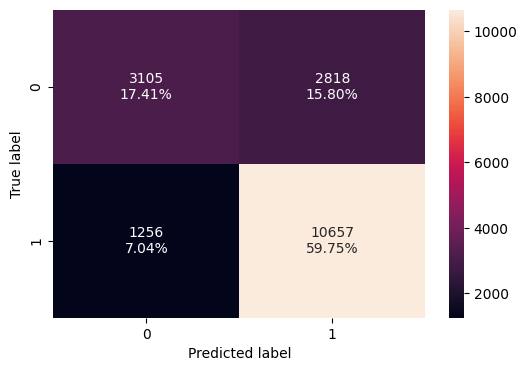

In [116]:
# Create Confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [117]:
# Check performance metrics on the training set
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.771586  0.894569   0.790872  0.83953


**Checking Stacking Classifier model performance on the test set**

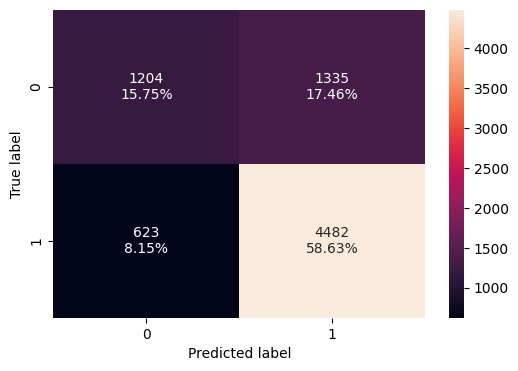

In [118]:
# Create Confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [119]:
# Check performance metrics on the test set
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743851  0.877963     0.7705  0.820729


**Observations**

The Stacking classifier gives good generalized performance on the test data. The F1 score is 82% and it is very similar to the Hyperparameter tuned Gradient boosting and Hyperparameter tuned XGBoost model.

## Model Performance Comparison and Conclusions

Lets compare the performance metrics on the training set and test set for all the models we have created and get insights.

**Model Performance Comparison - Training set**

In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.710193,0.985198,0.998710,1.0,0.795582,0.738226,0.754317,0.758802,0.753756,0.850807,0.762110,0.771586
Recall,1.0,0.725762,0.985982,0.999916,1.0,0.909091,0.887182,0.889365,0.883740,0.883992,0.935952,0.888189,0.894569
Precision,1.0,0.819681,0.991810,0.998157,1.0,0.808631,0.760688,0.775679,0.783042,0.777712,0.854537,0.784243,0.790872
F1,1.0,0.769868,0.988887,0.999036,1.0,0.855923,0.819080,0.828641,0.830349,0.827453,0.893394,0.832986,0.839530


**Model Performance comparison - Test set**

In [121]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.707483,0.691523,0.725929,0.727368,0.743066,0.734301,0.740450,0.744767,0.742936,0.729984,0.744898,0.743851
Recall,0.742801,0.726543,0.764153,0.888737,0.847209,0.873849,0.885015,0.881293,0.876004,0.878355,0.851518,0.877767,0.877963
Precision,0.752232,0.815344,0.771711,0.748186,0.768343,0.771666,0.757799,0.765527,0.772366,0.769389,0.768972,0.771655,0.770500
F1,0.747487,0.768386,0.767913,0.812427,0.805851,0.819585,0.816481,0.819341,0.820927,0.820269,0.808143,0.821298,0.820729


**Model Performance Comparison - Conclusion**

*   The Hyperparameter tuned XGBoost classifier gives the highest F1 score among all the models.
*   The tuned Random Forest classifier and the tuned AdaBoost classifier models gives almost similar F1 score of 81.9%. However the tuned Random Forest classifier model does not generalize well on the test data. There is a difference of 4% of the performance metrics values between the training and test data.
*   The tuned Gradient Boost classifier and the default Gradient Boost classifier gives almost similar results on the F1 score. The Recall score is slightly higher in the tuned Gradient Boost classifier but the precision has gone down making the F1 score a little lesser than the default Gradient Boost classifier model. Hence the Hypertuning of parameters to Gradient Boosting did not help much and also the processing time is close to 13 minutes.
*   The default Decision tree, default Bagging classifier, the default Random Forest classifier and the Hyperparameter tuned Bagging classifier models does not generalize well on the test data. Hence these models cannot be considered for providing machine learning based solution for EasyVisa.
*   The default XGBoost classifier does not generalize well on the test data as there is a huge difference in the performance metrics values between the training and test set.
*   The F1 score of Stacking classifier is 82% and it is very similar to the Hyperparameter tuned Gradient boosting and Hyperparameter tuned XGBoost model. However when comparing the generalization of data, the difference in the performance metrics values of F1 score, Recall and Precision is around 2% between the training and test data for stacking classifier whereas the difference is around 1.2% for tuned XGBoost classifier.

**Overall both the Gradient Boost classifier and the XGBoost tuned classifier models gives high performance results on all the metrics. Both the model's performance are almost similar with XGBoost tuned model taking a slightly upper edge.**









### Feature importance of Tuned XGBoost Classifier

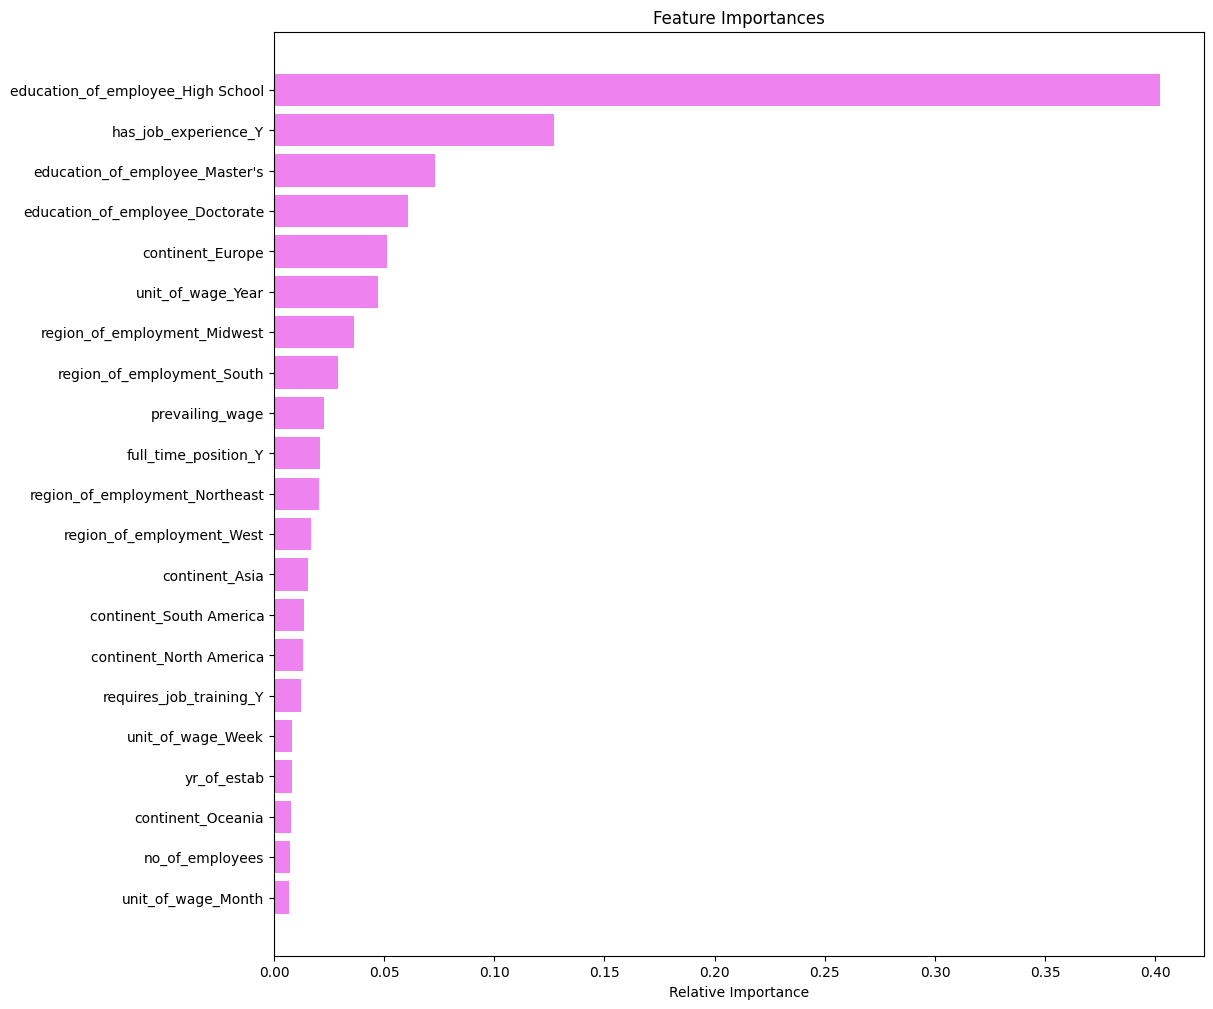

In [122]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**

The features such as education of the employee, the employees job experience takes highest precedence in the XGBoost tuned model.

## Actionable Insights and Recommendations

*   The hyperparameter tuned XGBoost classifier model can be implemented to facilitate OFLC in determining the decision for visa certification process.
*   The features such as education of employees, previous job experience and the demography the employee applies from and the unit of wage plays a key role in determining whether the visa application should be certified or denied.
*   Candidates applying to work for the employers who pay an yearly salary have less probability of their visa getting denied meaning the probability of the visa getting certified is 70% which is higher than other unit of wage.Hence the OFLC can consider the unit of wage as a key factor for visa applications.
*   The job experience factor can be taken as a first level of scrutiny in determining the visa certification by OFLC as the applicants with prior job experience has 70% probability of getting their visa certified.
*   The OFLC can consider the employees who have completed a minimum education of Bachelor's for further scrutiny of visa certification.






